In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [24]:
figures_path = '/Users/earl/Dropbox/CMIP5/figures/'
script_name = nb_name[:-6]
print('Figures will be saved in: ' + figures_path + script_name + '\n')

remote_domain = 'erd561@raijin.nci.org.au:'
remote_path = '/g/data/e14/erd561/R8exp/temp/'
local_path = '/Users/earl/Desktop/alamanda/'
os.system('sshfs ' +
          remote_domain +
          remote_path + ' ' +
          local_path)

Figures will be saved in: /Users/earl/Dropbox/CMIP5/figures/p21_get_u10_v10



256

In [11]:
u_10_ncra = xr.open_dataset(
    local_path + 'u_10_ncra.nc', decode_times=False)['U_10_MOD'][0,:,:]
u_10_hist_ncra = xr.open_dataset(
    local_path + 'u_10_hist_ncra.nc', decode_times=False)['U_10'][0,:,:]
u_10_rcp85_ncra = xr.open_dataset(
    local_path + 'u_10_rcp85_ncra.nc', decode_times=False)['U_10'][0,:,:]

xt_ocean = xr.open_dataset(
    local_path + 'u_10_ncra.nc', decode_times=False)['LON'][:]
yt_ocean = xr.open_dataset(
    local_path + 'u_10_ncra.nc', decode_times=False)['LAT'][:]

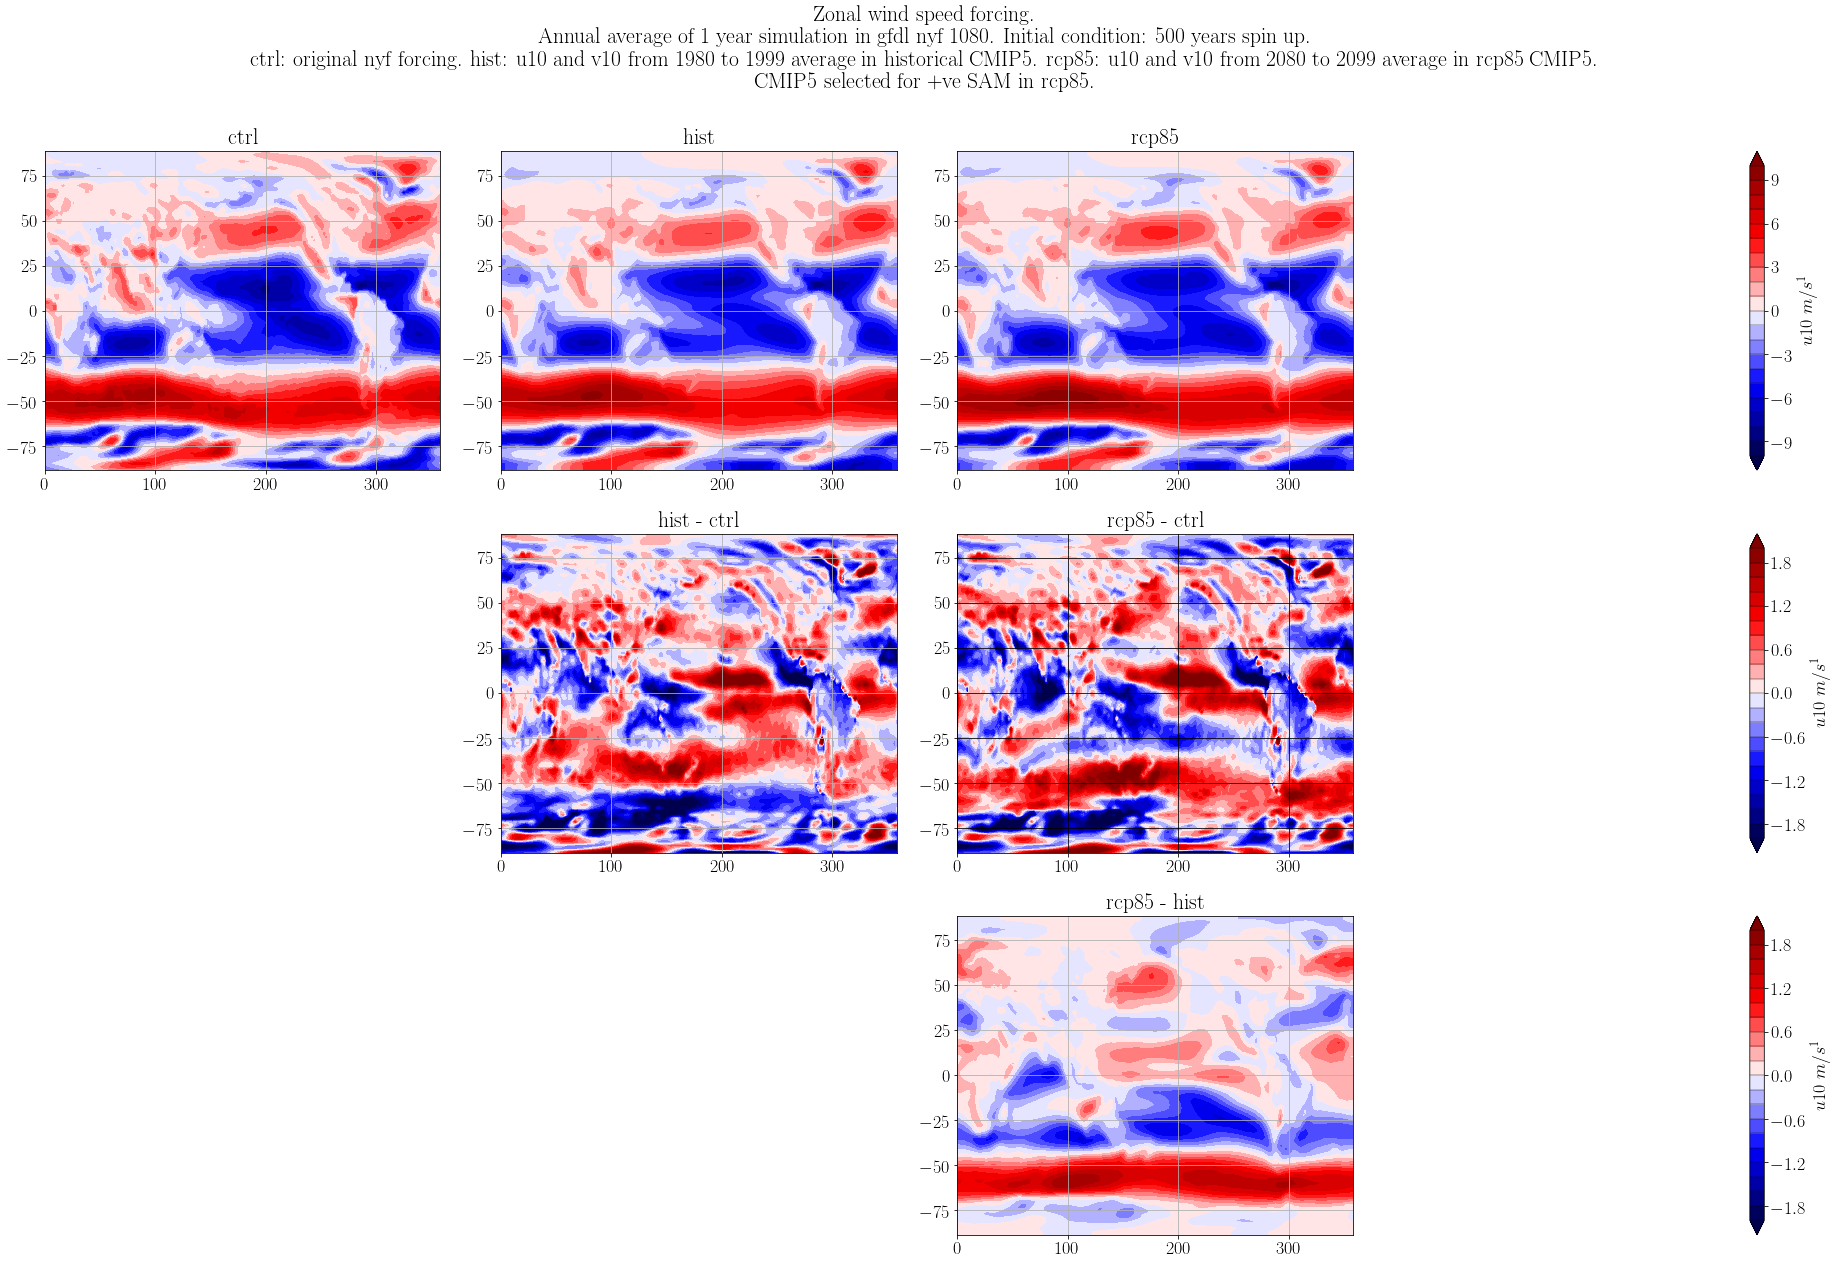

In [26]:
matplotlib.rcParams.update({'font.size': 18}) 
row = 3
col = 4
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.close('all')
fig = plt.figure() 
fig.set_size_inches(26, 18)

plt.suptitle('Zonal wind speed forcing.\n'
            + 'Annual average of 1 year simulation in gfdl nyf 1080. Initial condition: 500 years spin up.\n'
            + 'ctrl: original nyf forcing. ' 
            + 'hist: u10 and v10 from 1980 to 1999 average in historical CMIP5. '
            + 'rcp85: u10 and v10 from 2080 to 2099 average in rcp85 CMIP5.\n'
            + 'CMIP5 selected for +ve SAM in rcp85.')

cmap = plt.get_cmap('seismic')
step = 1
contf_lvls = np.arange(-10,10+1e-08,step)  
ax = plt.subplot2grid((row, col), (0, 0))
ax.set_facecolor('grey')
plt.contourf(xt_ocean, yt_ocean, u_10_ncra, contf_lvls, cmap=cmap, extend='both')
ax.set_title('ctrl')
plt.grid()
ax = plt.subplot2grid((row, col), (0, 1))
ax.set_facecolor('grey')
plt.contourf(xt_ocean, yt_ocean, u_10_hist_ncra, contf_lvls, cmap=cmap, extend='both')
ax.set_title('hist')
plt.grid()
ax = plt.subplot2grid((row, col), (0, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt_ocean, yt_ocean, u_10_rcp85_ncra, contf_lvls, cmap=cmap, extend='both')
ax.set_title('rcp85')
plt.grid()
ax = plt.subplot2grid((row, col), (0, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'$u10$ $m/s^{1}$') 
plt.axis('off')

cmap = plt.get_cmap('seismic')
step = 0.2
contf_lvls = np.arange(-2,2+1e-08,step)  
# ax = plt.subplot2grid((row, col), (1, 0))
# plt.contourf(ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
ax = plt.subplot2grid((row, col), (1, 1))
ax.set_facecolor('grey')
plt.contourf(xt_ocean, yt_ocean, u_10_hist_ncra - u_10_ncra, contf_lvls, cmap=cmap, extend='both')
ax.set_title('hist - ctrl')
plt.grid()
ax = plt.subplot2grid((row, col), (1, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt_ocean, yt_ocean, u_10_rcp85_ncra - u_10_ncra, contf_lvls, cmap=cmap, extend='both')
ax.set_title('rcp85 - ctrl')
plt.grid(c='black',ls='-')
ax = plt.subplot2grid((row, col), (1, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'$u10$ $m/s^{1}$') 
plt.axis('off')

cmap = plt.get_cmap('seismic')
step = 0.2
contf_lvls = np.arange(-2,2+1e-08,step)  
# ax = plt.subplot2grid((row, col), (1, 0))
# plt.contourf(ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
# ax = plt.subplot2grid((row, col), (1, 1))
# plt.contourf(ice_month_hist_ncra_SST - ice_month_ctrl_ncra_SST, contf_lvls, cmap=cmap, extend='both')
ax = plt.subplot2grid((row, col), (2, 2))
ax.set_facecolor('grey')
contf = plt.contourf(xt_ocean, yt_ocean, 
    u_10_rcp85_ncra - u_10_hist_ncra, 
    contf_lvls, cmap=cmap, extend='both')
ax.set_title('rcp85 - hist')
plt.grid()
ax = plt.subplot2grid((row, col), (2, 3))
cbar = plt.colorbar(contf, orientation='vertical', drawedges=True)
cbar.set_label(r'$u10$ $m/s^{1}$') 
plt.axis('off')

fig.tight_layout(rect=[0, 0, 1, 0.90])

output_ls = os.listdir(figures_path)
if not script_name:
    script_name = 'test'
elif script_name not in output_ls:
    os.mkdir(figures_path + '/' + script_name)
plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
            + '_fig1_' + '.png', bbox_inches='tight', dpi=200)